#CSE 101: Computer Science Principles
####Stony Brook University
####Kevin McDonnell (ktm@cs.stonybrook.edu)
##Module 15: Random Numbers and Simulation



### Overview of Random Numbers

Applications of **random numbers** include:
* games, such as simulating the rolling of a 6-sided die or shuffling cards
* simulate events in a mathematical, computerized model of a phenomenon or scenario
* encryption of data transferred across the Internet
* many others!

Computers cannot generate truly "random" numbers, but rather **pseudorandom numbers**. The values are generated using the current time and one or more mathematical formulas. Code that generates pseudorandom values is called a **pseudorandom number generator**, or **PRNG** or **RNG**, for short.

### The `random` Module

Python's [`random` module](https://docs.python.org/3/library/random.html) is relatively small and contains functions for generating random integers and real numbers. We will explore only a few of the functions.

In [ ]:
import random

### `random.randint(a, b)`

The [`randint`](https://docs.python.org/3/library/random.html#random.randint) function returns a random integer in the range `a` through `b`, *inclusive of `b`*,

In [ ]:
# roll two six-sided dice until they match
die1 = random.randint(1, 6)
die2 = random.randint(1, 6)
print(f'Rolled: {die1} {die2}')
while die1 != die2:
    die1 = random.randint(1, 6)
    die2 = random.randint(1, 6)
    print(f'Rolled: {die1} {die2}')
print('Done!')

Rolled: 1 6
Rolled: 5 1
Rolled: 3 5
Rolled: 4 3
Rolled: 2 4
Rolled: 2 5
Rolled: 3 2
Rolled: 4 5
Rolled: 3 3
Done!


### `random.random()`

The [`random`](https://docs.python.org/3/library/random.html#random.random) function (yes, it has the same name as its module) returns a random real number in the range $[0, 1)$. It's useful for generating a random percentage (given as a decimal).

In [ ]:
# Assume our chance of randomly winning the game is 20%
if random.random() <= 0.2:
    print('Winner!')
else:
    print('Loser!')

Winner!


### `random.uniform(a, b)`

The [`uniform` function](https://docs.python.org/3/library/random.html#random.uniform) returns a random real number in the range $[a, b]$.

In [ ]:
gpa = random.uniform(0, 4)
print(gpa)

2.411420269155924


### Application: Approximating $\pi$

We can use the `uniform` function to compute an approximation of $\pi$. Suppose we have a $2\times2$ square centered over the origin, $(0,0)$, in a 2D space. The square's area is $2\times2=4$. A circle of radius $1$ would fit exactly in that square and would have the area $\pi \times 1^2 = \pi$.

Now imagine that we throw darts at the square. A certain proportion of the darts would fall inside the circle. 4 times that fraction would give us an estimate of $\pi$.

In [ ]:
import math

num_darts = 10000
inside_darts = 0
for i in range(num_darts):
    x = random.uniform(-1, 1)
    y = random.uniform(-1, 1)
    if math.sqrt(x*x + y*y) <= 1:
        inside_darts += 1

approx = 4*inside_darts/num_darts
print(f'Approximation: {approx}')
print(f'Actual: {math.pi}')
print(f'Error: {abs(approx - math.pi)}')

Approximation: 3.1424
Actual: 3.141592653589793
Error: 0.000807346410206744


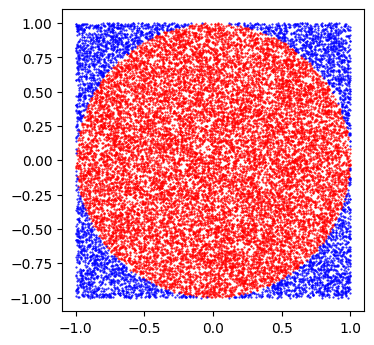

In [ ]:
import math
import matplotlib.pyplot as plt
import pandas as pd

num_darts = 20000
inside_darts = 0
xs = []
ys = []
labels = []
for i in range(num_darts):
    x = random.uniform(-1, 1)
    y = random.uniform(-1, 1)
    xs.append(x)
    ys.append(y)
    if math.sqrt(x*x + y*y) <= 1:
        inside_darts += 1
        labels.append('inside')
    else:
        labels.append('outside')

df = pd.DataFrame(dict(x=xs, y=ys, label=labels))  
groups = df.groupby('label')
cdict = {'inside': 'red', 'outside': 'blue'}
fig, ax = plt.subplots()
ax.set_aspect('equal')
fig.dpi = 100
ax.margins(0.05) 
for name, group in groups:
    ax.plot(group.x, group.y, marker='.', linestyle='', ms=1, color=cdict[name])
plt.show()

### `random.choice(seq)`

The [`choice` function](https://docs.python.org/3/library/random.html#random.choice) returns a random item from the given sequence (e.g., list). Imagine drawing a card at random from a deck of cards.

In [ ]:
cards = ['Ace of Hearts', 'Ace of Spades', 'Ace of Diamonds', 'Ace of Clubs']
card = random.choice(cards)
print(card)

Ace of Diamonds


### `random.sample(population, k)`

The [`sample` function](https://docs.python.org/3/library/random.html#random.sample) returns a set of `k` items chosen from `population`. Items are not "replaced" when they are chosen, meaning that `k` can be at most `len(population)`, or else we get an error.

In [ ]:
chosen = random.sample(cards, 3)
print(chosen)

['Ace of Diamonds', 'Ace of Clubs', 'Ace of Spades']


A run-time error occurs if `k` > `len(population)`.

In [ ]:
#chosen = random.sample(cards, 5)
#print(chosen)

### `random.choices(population, k)`

The [`choices` function](https://docs.python.org/3/library/random.html#random.choices) returns a set of `k` items chosen from `population`. Items are "replaced" when they are chosen, meaning that the same item can be chosen multiple times. You have to include the `k` argument by name when calling the function.

In [ ]:
chosen = random.choices(cards, k=5)
print(chosen)

['Ace of Hearts', 'Ace of Spades', 'Ace of Diamonds', 'Ace of Hearts', 'Ace of Hearts']


### `random.shuffle(seq)`

The [`shuffle`](https://docs.python.org/3/library/random.html#random.shuffle) function randomly *permutes* (rearranges) the items in `seq`. The original sequence is modified, not a copy. No value is returned.

In [ ]:
random.shuffle(cards)
print(cards)

['Ace of Clubs', 'Ace of Hearts', 'Ace of Spades', 'Ace of Diamonds']


### Example: One-player Blackjack Dice

Imagine a one-player "game" in which the player rolls two dice repeatedly and tries to accumulate a total as close as possible to 21 without going over. Suppose the player cannot quit until she achieves a total of at least 16.

In [ ]:
die1 = random.randint(1, 6)
die2 = random.randint(1, 6)
total = die1 + die2
print(f'Rolled: {die1} {die2}  Total: {total}')

answer = input('Roll again? ')
while total < 21 and answer == 'y':
    die1 = random.randint(1, 6)
    die2 = random.randint(1, 6)
    total += die1 + die2
    print(f'Rolled: {die1} {die2}  Total: {total}')
    if total < 21:
        answer = input('Roll again? ')

print(f'Final total: {total}')
if 16 <= total <= 21:
    print('You won!')
else:
    print('You lost!')

Rolled: 3 4  Total: 7
Roll again? n
Final total: 7
You lost!


### Example: Simulated Soccer Season

Two teams play 10 games against each other each season: the Spoons and the Forks. During each game, the Spoons score goals with the following probabilities:
* 0 goals: 35%
* 1 goal: 10%
* 2 goals: 10%
* 3 goals: 15%
* 4 goals: 30%

The Forks score goals with different probabilities:
* 0 goals: 10%
* 1 goal: 20%
* 2 goals: 40%
* 3 goals: 20%
* 4 goals: 10%

Let's find out who will have the winning record this season.

In [ ]:
# Replace the event probabilities with cumulative probabilities
def accumulate_probs(probs):
    total = 0
    for i, prob in enumerate(probs):  
        probs[i] = (total+prob[0], prob[1])
        total = probs[i][0]

def lookup_event(random_num, probs):
    for prob in probs:
        if random_num <= prob[0]:
            return prob[1] 

spoons_probs = [(0.35, 0), (0.1, 1), (0.1, 2), (0.15, 3), (0.3, 4)]
forks_probs = [(0.1, 0), (0.2, 1), (0.4, 2), (0.2, 3), (0.1, 4)]
accumulate_probs(spoons_probs)
accumulate_probs(forks_probs)
#print(spoons_probs)

# Simulate 10 games
spoons_wins = 0
forks_wins = 0
for i in range(10):
    spoons_score = lookup_event(random.random(), spoons_probs)
    forks_score = lookup_event(random.random(), forks_probs)
    spoons_wins += 1 if spoons_score > forks_score else 0
    forks_wins += 1 if forks_score > spoons_score else 0

print(f'Spoons vs. Forks: {spoons_wins}-{forks_wins}')

Spoons vs. Forks: 4-4


### Example: Department Store Santa Claus

The local department store has hired a professional Santa Claus to sit with kids. Santa will sit only from 2:00 pm to 2:15 pm each afternoon. Children will arrive periodically, get in line, *really quickly* tell Santa what they want, and then leave. Each child will take 30 seconds, so at most two kids can talk with Santa per minute.

Children arrive each minute with the following probabilities and get in line:
* 10% of the minutes, no child arrives (during that minute)
* 20% of the minutes, 1 child arrives
* 30% of the minutes, 2 children arrive
* 30% of the minutes, 3 children arrive
* 10% of the minutes, 4 children arrive

This experiment is an example of a **queue simulation** featuring a **single-server queue** because there is a single Santa Claus servicing requests. For this experiment, we are mostly interested in understanding just how long the queue (line) of kids can get.

In [ ]:
kids_probs = [(0.1, 0), (0.2, 1), (0.3, 2), (0.3, 3), (0.1, 4)]
accumulate_probs(kids_probs)

queue = 0
for i in range(1, 16):  
    arrivals = lookup_event(random.random(), kids_probs)
    served = min(queue+arrivals, 2)
    queue = queue + arrivals - served
    print(f'Minute #{i}:  Arrivals: {arrivals}  Served: {served}  Queue: {queue}')

Minute #1:  Arrivals: 2  Served: 2  Queue: 0
Minute #2:  Arrivals: 0  Served: 0  Queue: 0
Minute #3:  Arrivals: 3  Served: 2  Queue: 1
Minute #4:  Arrivals: 4  Served: 2  Queue: 3
Minute #5:  Arrivals: 2  Served: 2  Queue: 3
Minute #6:  Arrivals: 3  Served: 2  Queue: 4
Minute #7:  Arrivals: 3  Served: 2  Queue: 5
Minute #8:  Arrivals: 0  Served: 2  Queue: 3
Minute #9:  Arrivals: 1  Served: 2  Queue: 2
Minute #10:  Arrivals: 0  Served: 2  Queue: 0
Minute #11:  Arrivals: 3  Served: 2  Queue: 1
Minute #12:  Arrivals: 2  Served: 2  Queue: 1
Minute #13:  Arrivals: 2  Served: 2  Queue: 1
Minute #14:  Arrivals: 3  Served: 2  Queue: 2
Minute #15:  Arrivals: 0  Served: 2  Queue: 0


### Application from Biology: the Lotka-Volterra Equations

The Lotka-Volterra equations describe an ecological predator-prey model (e.g., foxes preying upon rabbits) of how populations of predators and their prey evolve over time. We have these variables:
* $x$: the population of the prey (e.g., rabbits)
* $y$: the population of the predators (e.g., foxes)
* $a$: the growth rate of the prey 
* $b$: the rate at which predators destroy (eat) prey
* $c$: the death rate of predators
* $d$: the rate at which predators increase by consuming prey

The number of prey changes at the rate $\Delta x = ax - bxy$.

The number of predators changes at the rate $\Delta y = -cy + dxy$.

See [Wikipedia](https://en.wikipedia.org/wiki/Lotka%E2%80%93Volterra_equations) and [Wolfram](https://mathworld.wolfram.com/Lotka-VolterraEquations.html) for more on these equations, especially if you are a biology major.

In [ ]:
x = 100
y = 100
a = 0.03    # growth rate of the prey
b = 0.0009  # rate at which predators destroy prey
c = 0.05    # death rate of predators
d = 0.0005  # rate at which predators increase by consuming prey

for i in range(20):
    delta_x = a*x - b*x*y
    delta_y = -c*y + d*x*y
    x += delta_x
    y += delta_y
    print(x, y)

94.0 100.0
88.36 99.7
83.0822572 99.119746
78.1631419083064 98.28130481538534
73.59425814785897 97.20822736222532
69.36351525156249 95.92479968340974
65.45610753385043 94.4554003521609
61.8553762015224 92.82397175585481
58.54354196343797 91.05360401480101
55.50230778353462 89.16622405784234
52.71333892664208 87.18237846072721
50.15863225663336 85.12109666980639
47.82078921770442 82.99982072888714
45.68320765527053 80.83438815853447
43.73020715898888 78.63905582057428
41.94710139211965 76.42655413045607
40.32022926023873 74.20816263151355
38.83695502079056 71.99379956507973
37.48564571147795 69.79211956456814
36.25563268211683 67.61061492006499


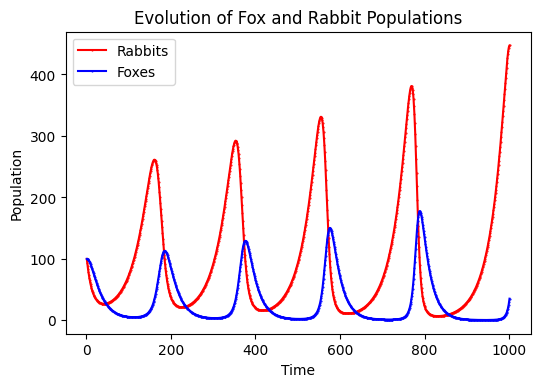

In [ ]:
x = [100]
y = [100]
a = 0.03    # growth rate of the prey
b = 0.0009  # rate at which predators destroy prey
c = 0.05    # death rate of predators
d = 0.0005  # rate at which predators increase by consuming prey

for i in range(1000):
    delta_x = a*x[-1] - b*x[-1]*y[-1]
    delta_y = -c*y[-1] + d*x[-1]*y[-1]
    x.append(x[-1] + delta_x)
    y.append(y[-1] + delta_y)

import math
import matplotlib.pyplot as plt

fig, ax = plt.subplots()
fig.dpi = 100
ax.set_xlabel('Time')
ax.set_ylabel('Population')
ax.set_title('Evolution of Fox and Rabbit Populations')
ax.plot(list(range(1, len(x)+1)), x, marker='.', ms=1, color='red', label='Rabbits')
ax.plot(list(range(1, len(y)+1)), y, marker='.', ms=1, color='blue', label='Foxes')
ax.legend()
plt.show()